<a href="https://colab.research.google.com/github/poojameshram98/Resume-Projects/blob/main/Project1_NLP_Pooja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 NLP
Student Name : Pooja Meshram

# Heart Disease Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


### Description

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

### Heart Disease Classification

Perform exploratory data analysis on the data. Then, train and validate different ML classifiers.

The main expectation is to demonstrate your skills on data analysis and training efficient ML models.
Pick some metrics to evaluate and validate your model.
Try to improve the metrics using all you have learned in the course.


# Step 1: Load and Explore the Dataset

Mathematical Concept :

*   Our dataset contains features X and a target variable y

*   Each row in
X is a vector of features:
𝑋
=
{
𝑥
1
,
𝑥
2
,
𝑥
3
,
.
.
.
,
𝑥
𝑛
}


*   Our goal is to find a function
𝑓
(
𝑋
)
that best predicts
y.




In [ ]:
import pandas as pd
df = pd.read_csv("heart (1).csv")
df.shape

(303, 14)

In [ ]:
from google.colab import drive
drive.mount('/content/heart1.csv')

Drive already mounted at /content/heart1.csv; to attempt to forcibly remount, call drive.mount("/content/heart1.csv", force_remount=True).


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.thal.unique()

array([1, 2, 3, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#Step 2: Exploratory Data Analysis (EDA)

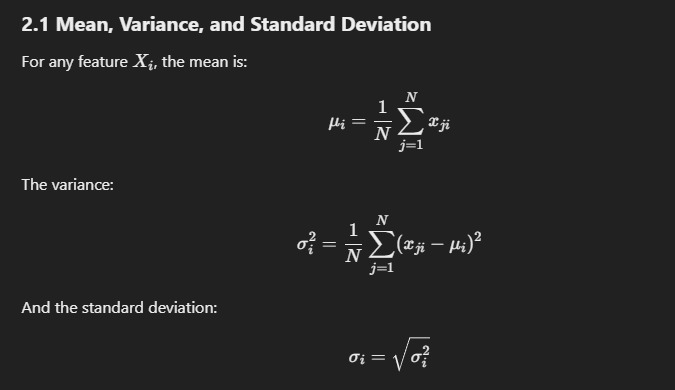

In [ ]:
# Summary statistics of numerical features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Step 3: Data Preprocessing

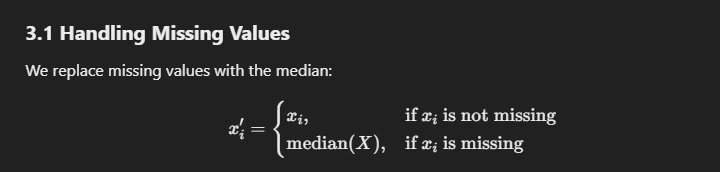

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
# Detect and handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply encoding only if categorical columns exist
if not categorical_cols.empty:
    df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
    df.drop(columns=categorical_cols, inplace=True)
    df = pd.concat([df, df_encoded], axis=1)


# Step 4: Splitting Data into Training & Testing Sets
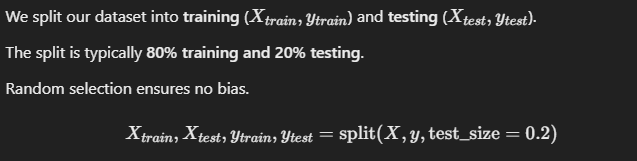

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Baseline Model (Linear Regression)
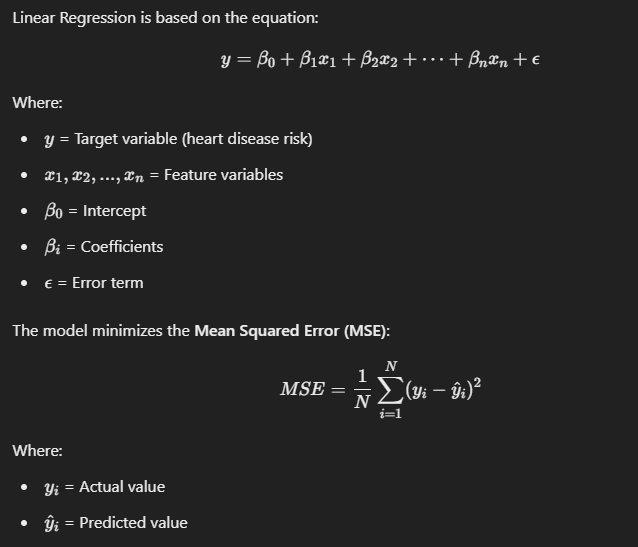

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a simple Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.14261462864436916
R² Score: 0.4251951348352665


# lets try some other approch

lets try to increase the R² score and decrease the Mean Squared Error (MSE) of my model to improve its performance.

Feature engineering

**Feature Interaction & Cross Features (Multiplicative & Ratio-based).**

1.   Log Transformation for skewed data.
2.   Non-Linearity Check using scatter plots.

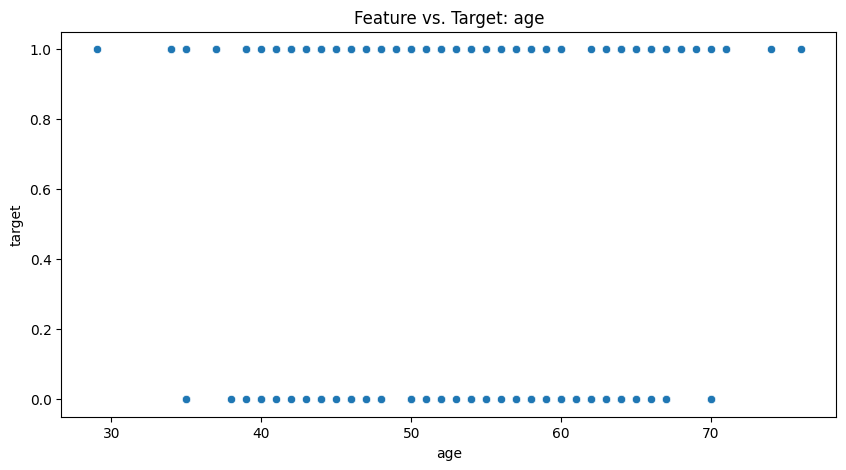

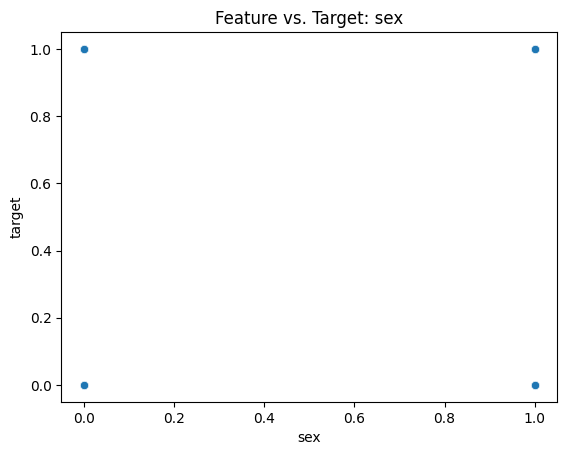

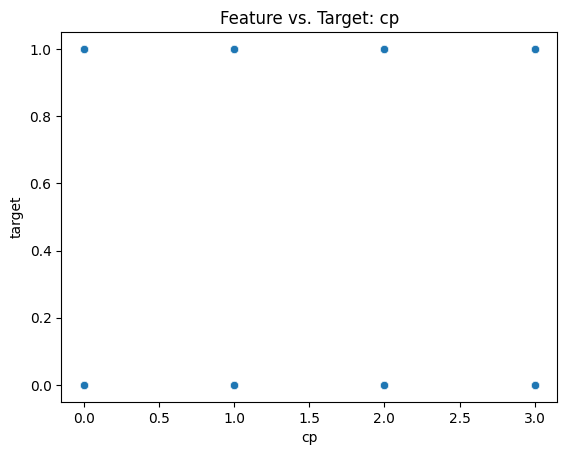

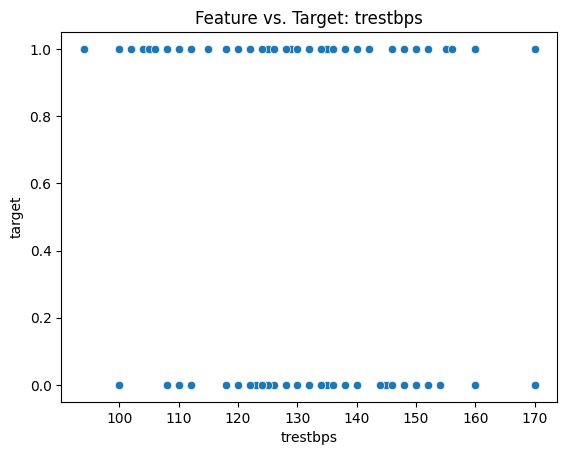

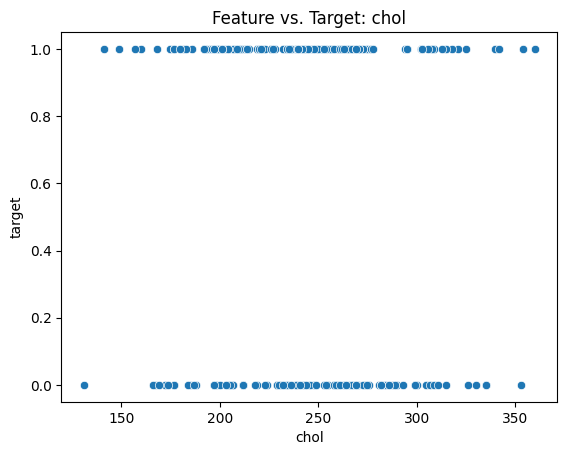

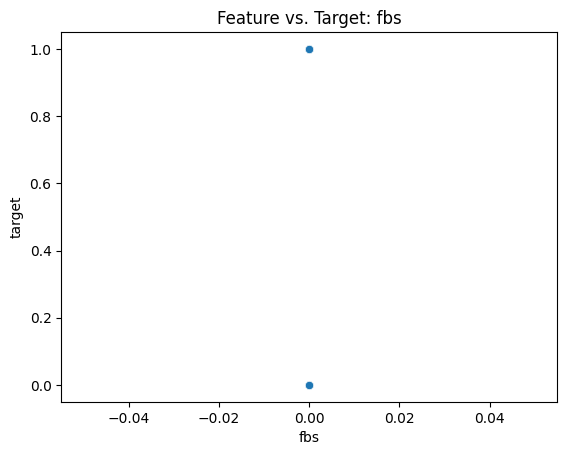

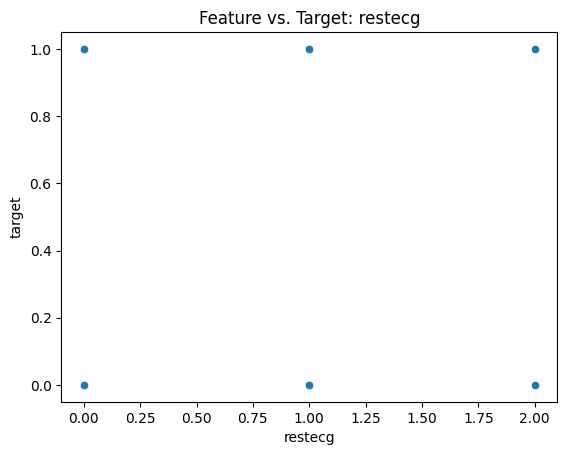

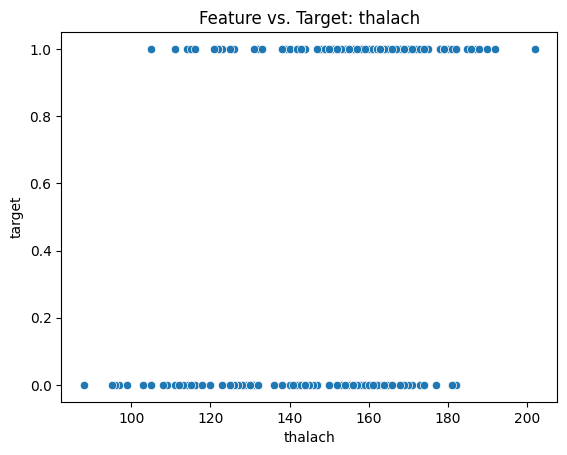

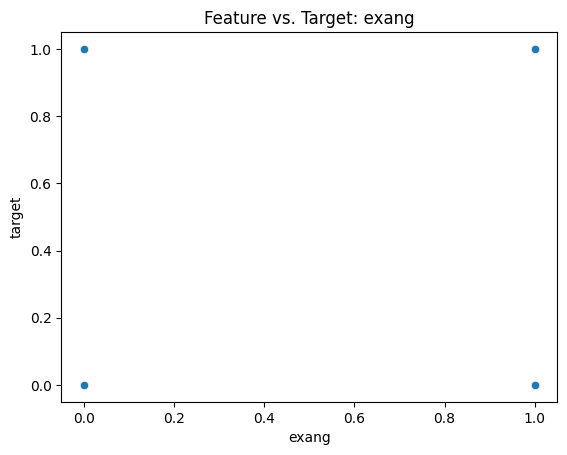

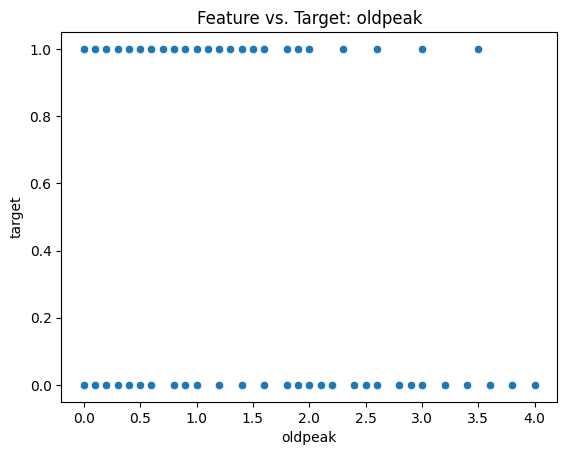

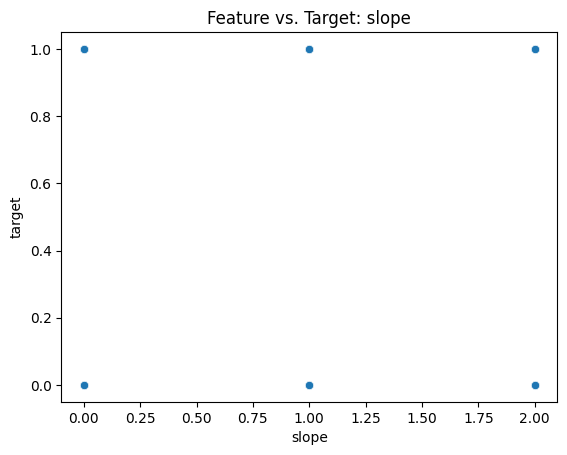

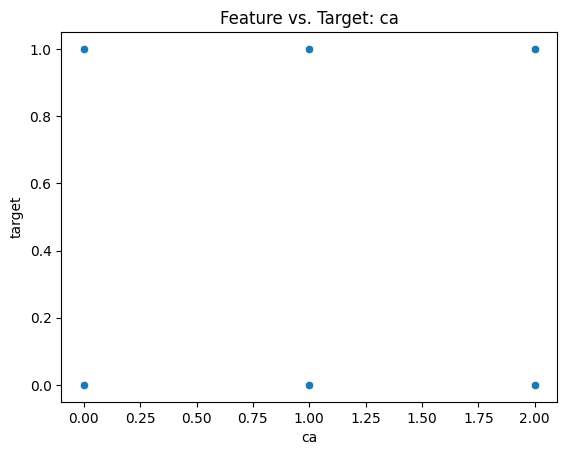

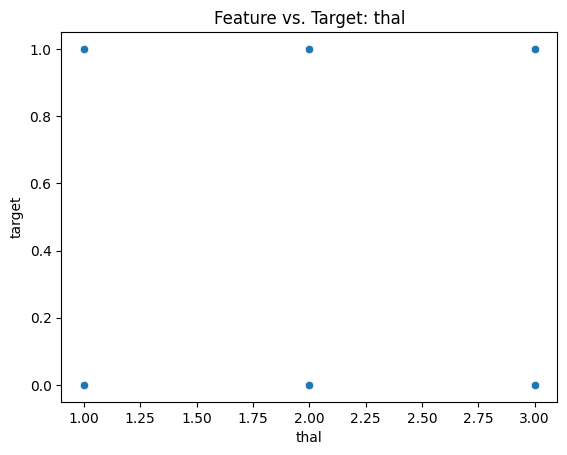

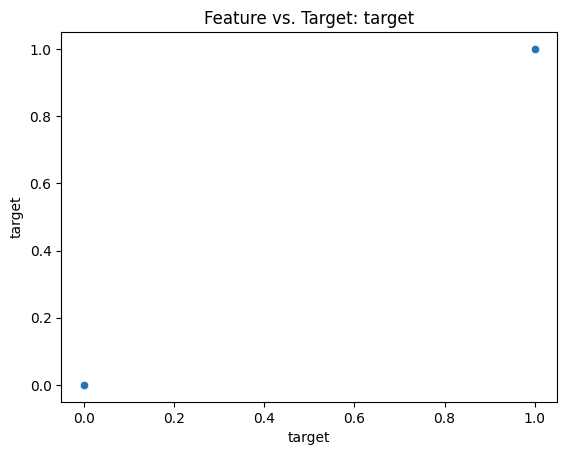

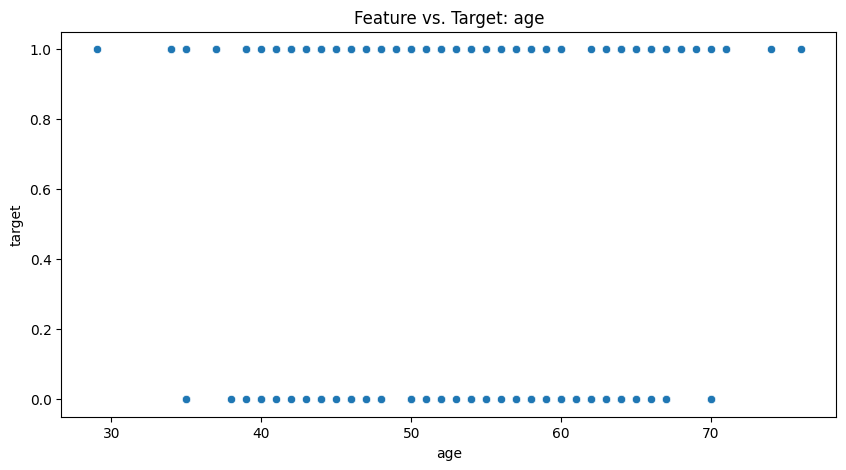

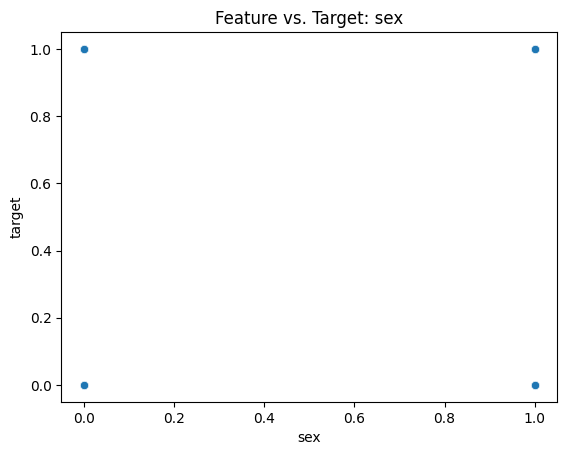

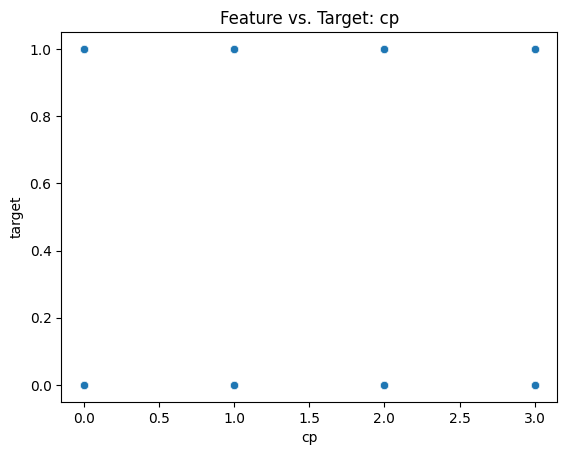

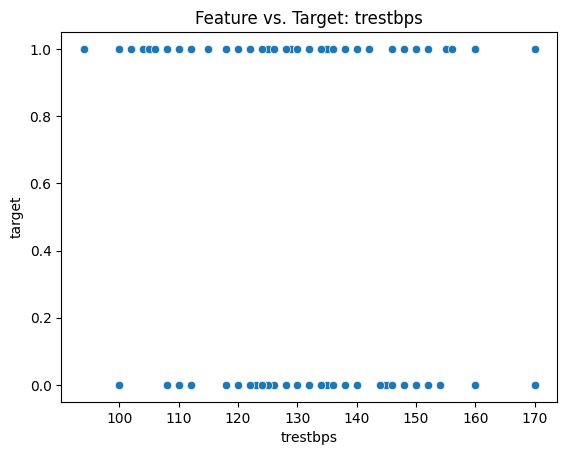

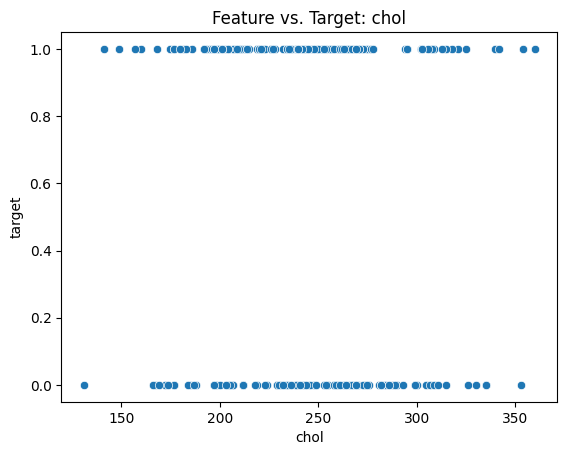

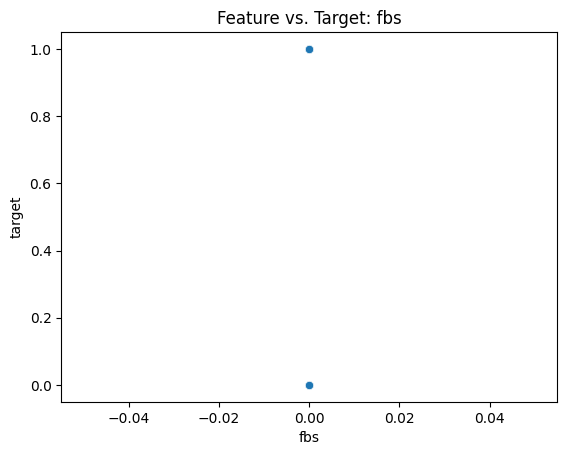

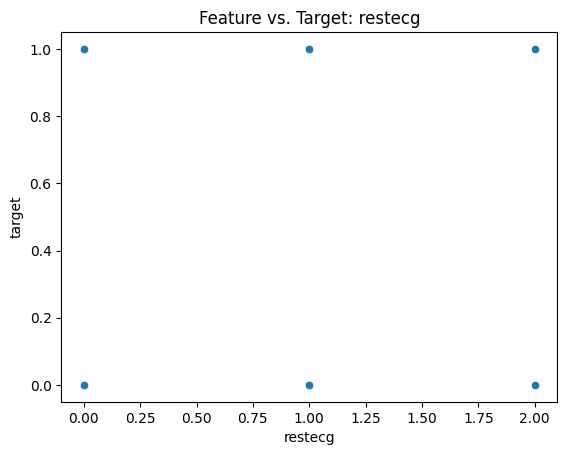

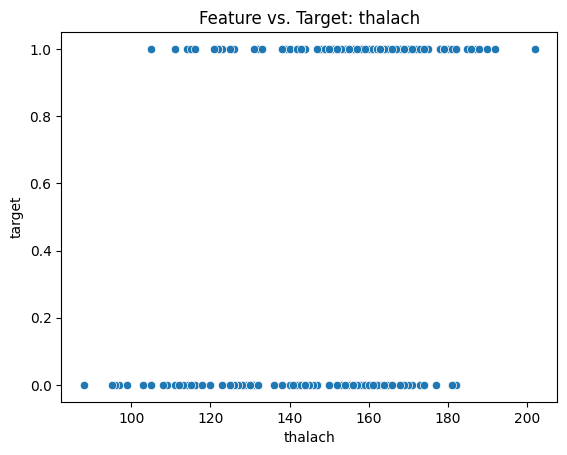

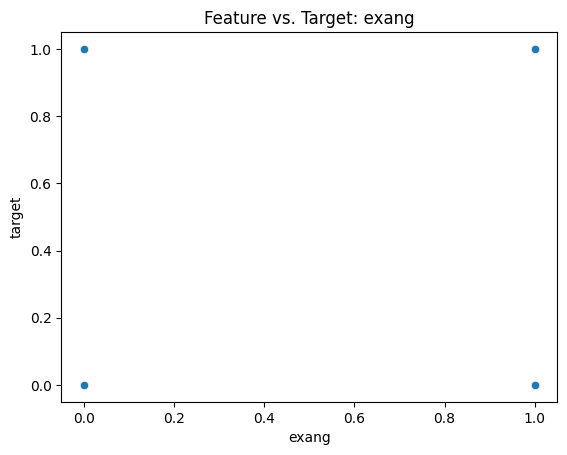

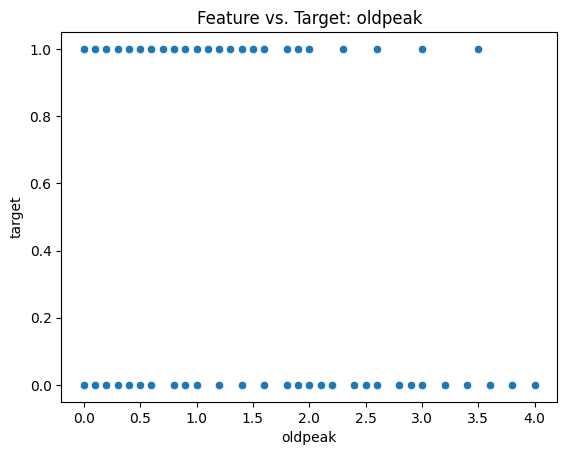

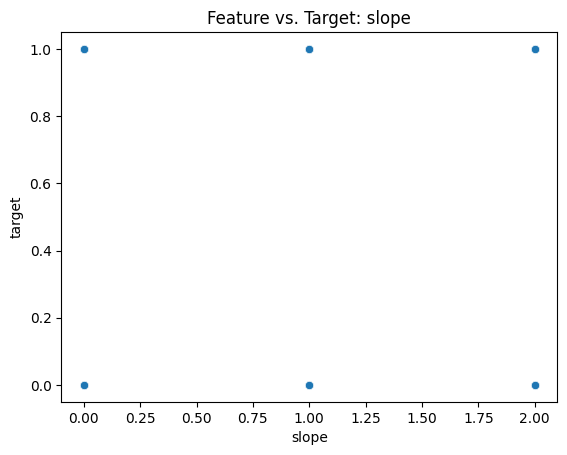

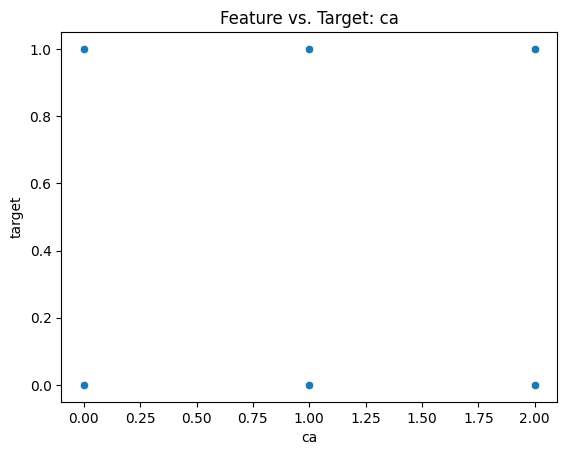

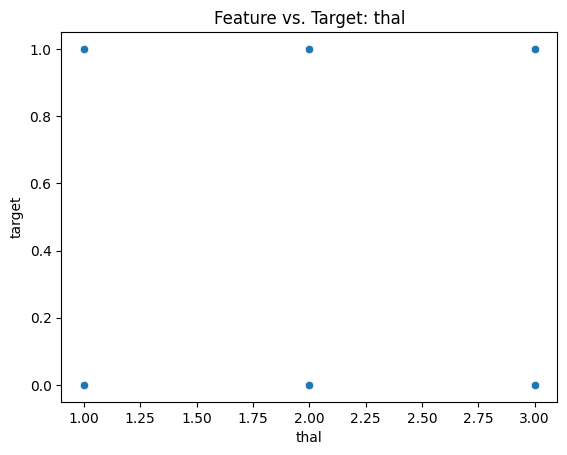

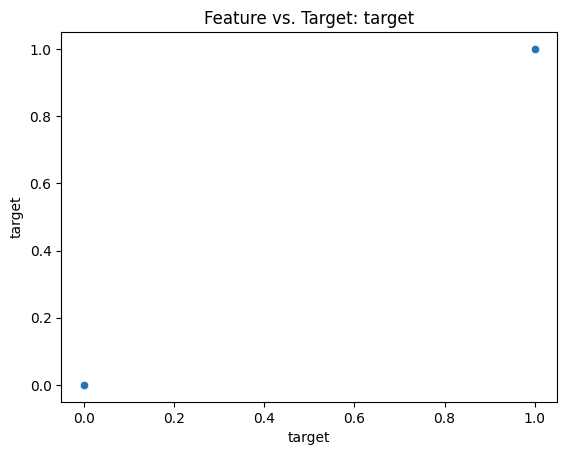

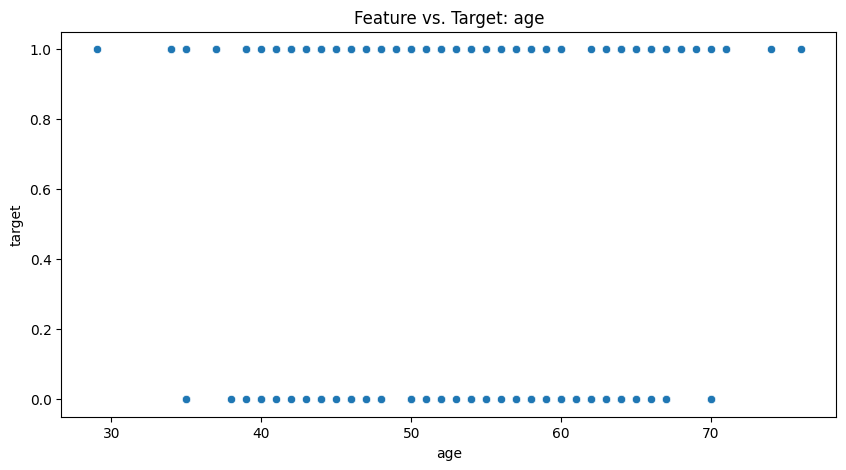

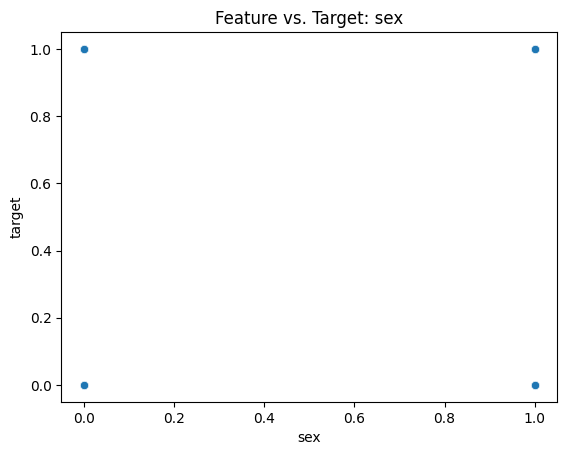

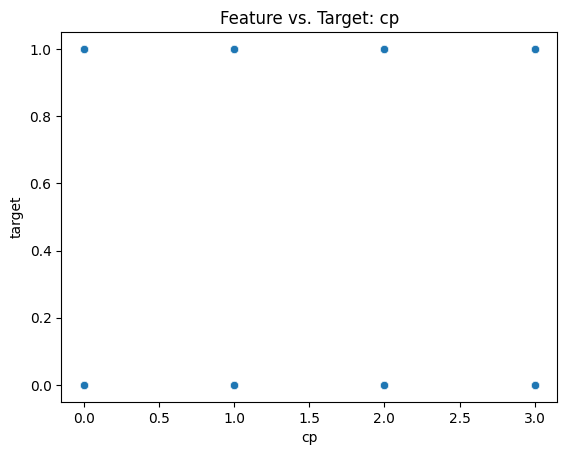

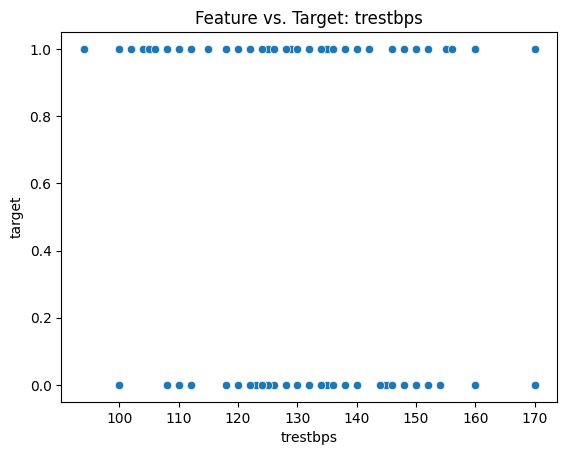

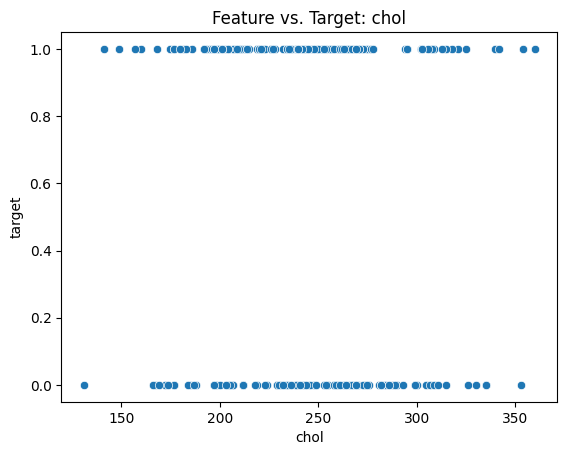

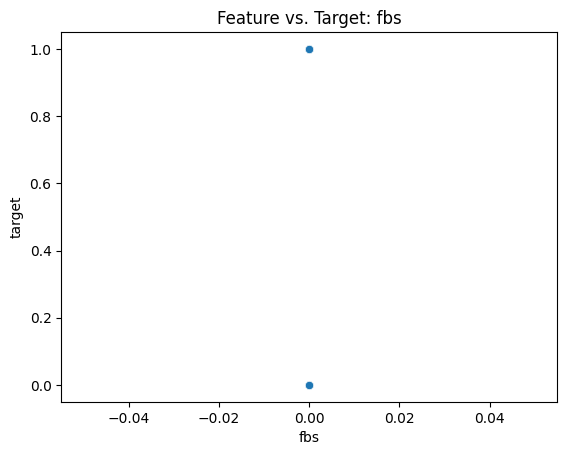

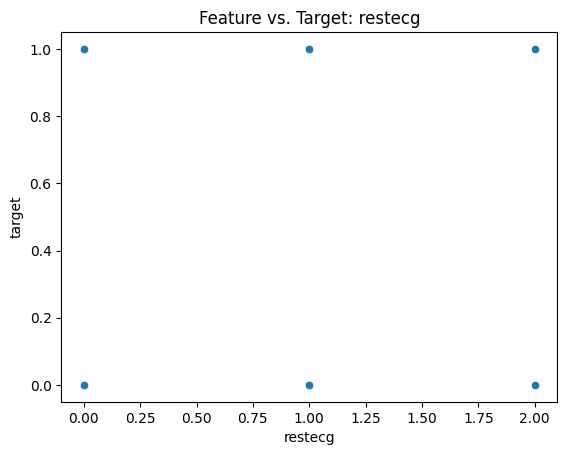

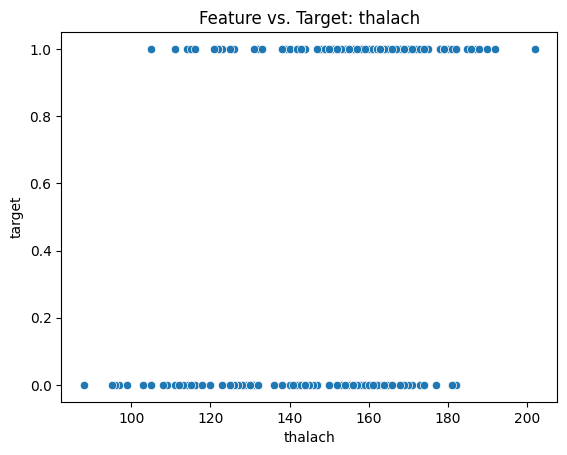

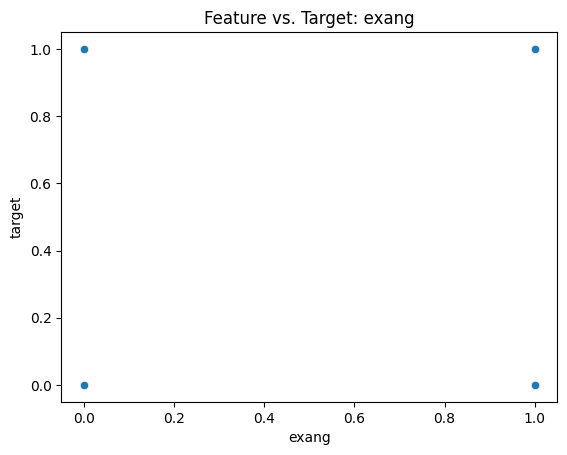

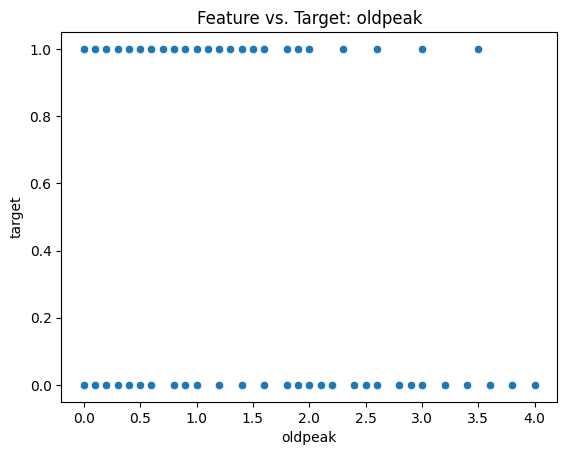

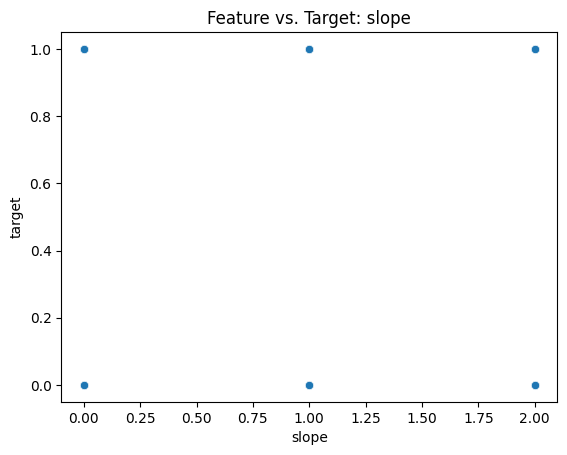

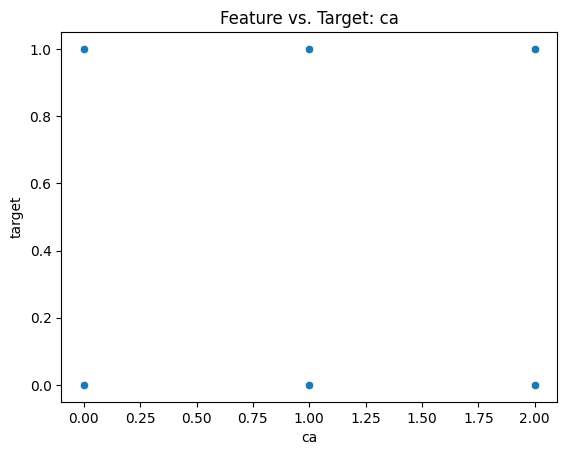

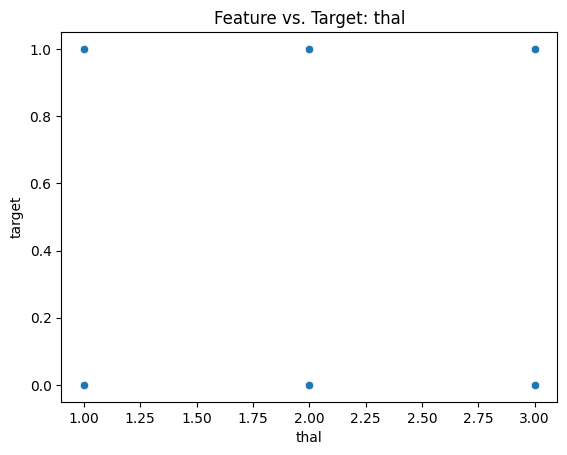

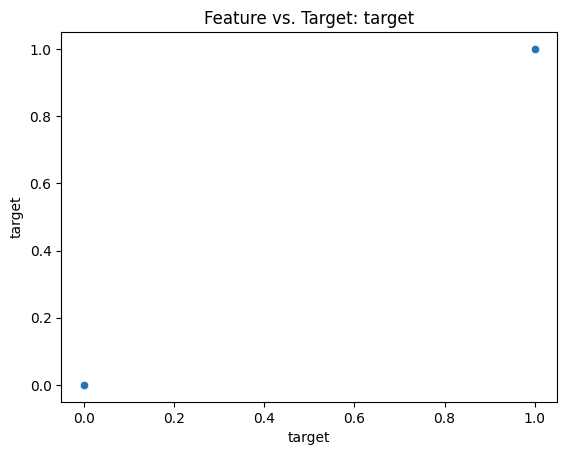

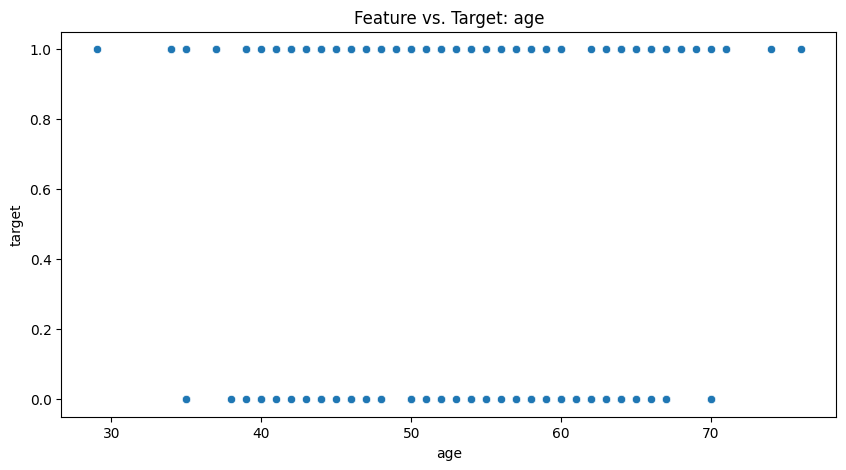

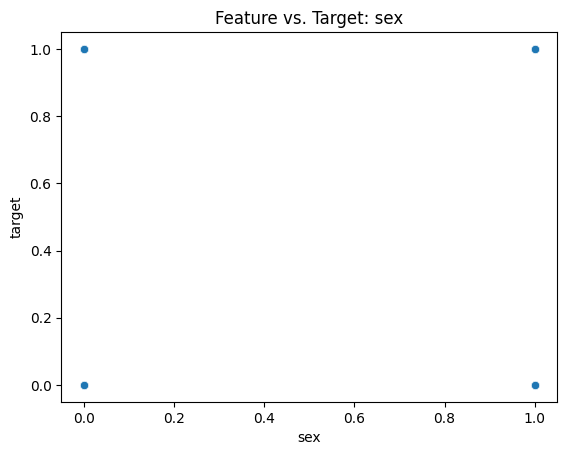

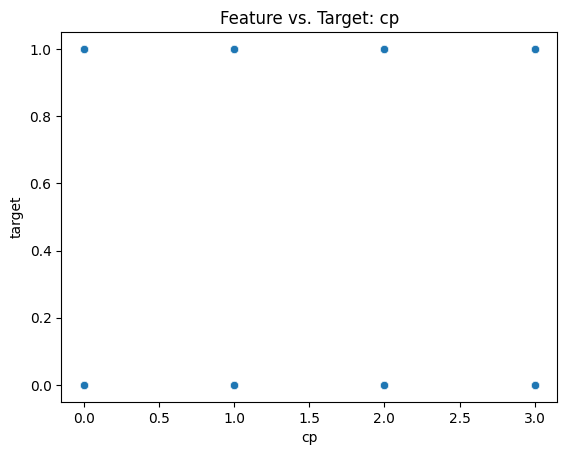

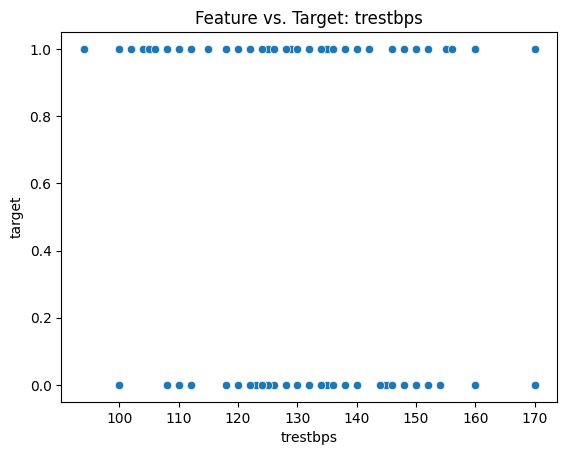

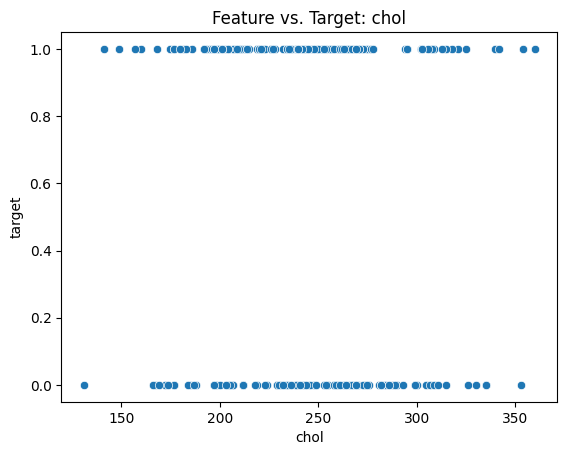

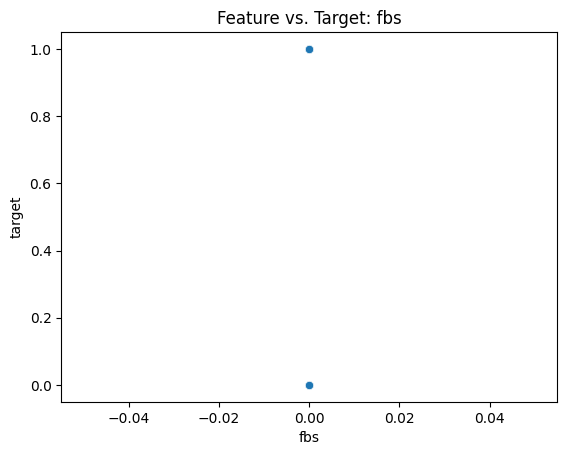

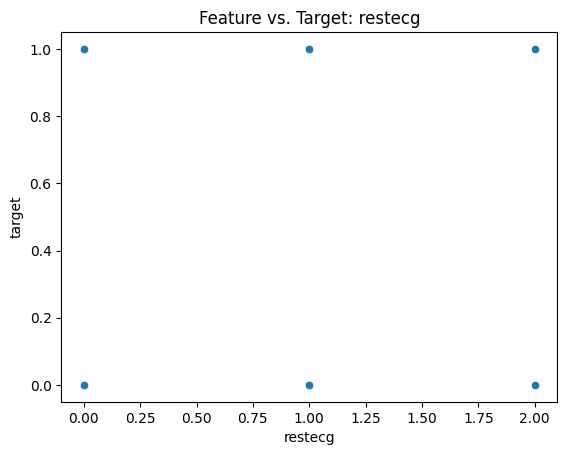

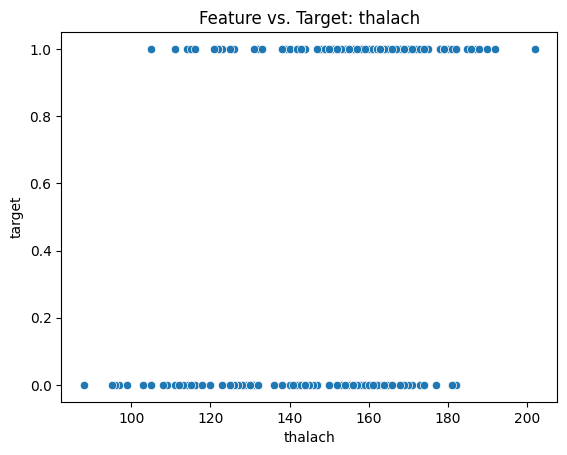

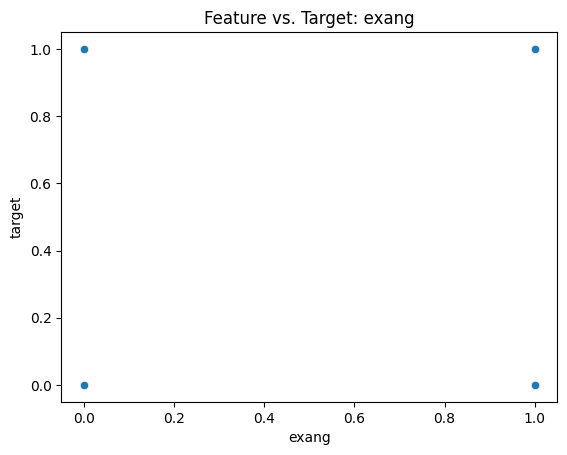

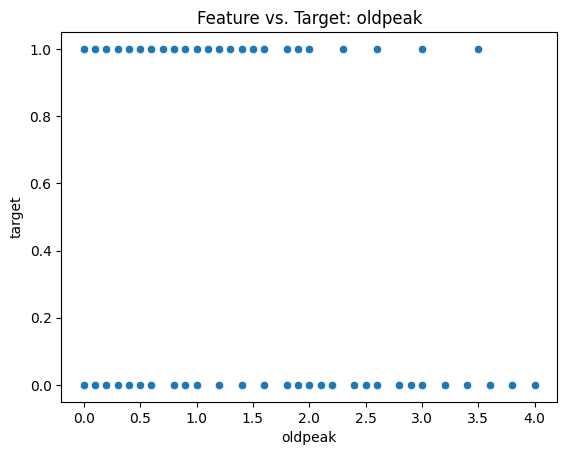

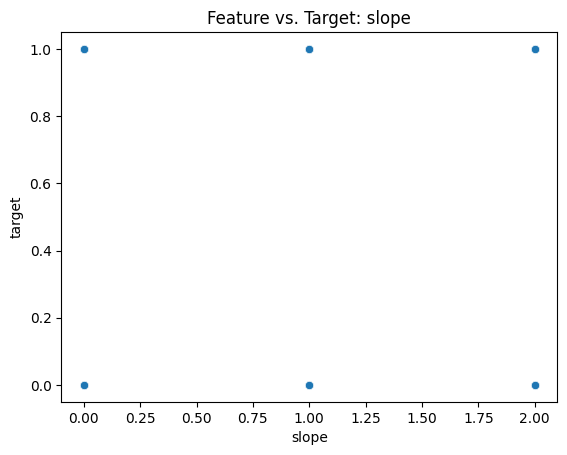

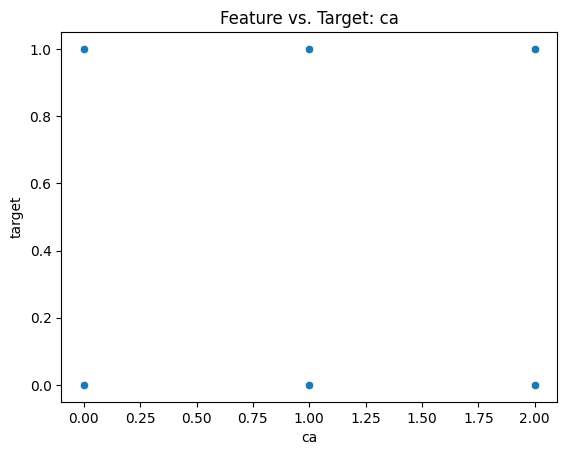

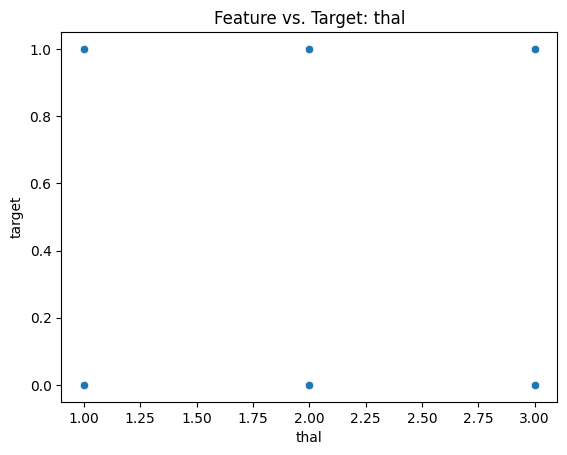

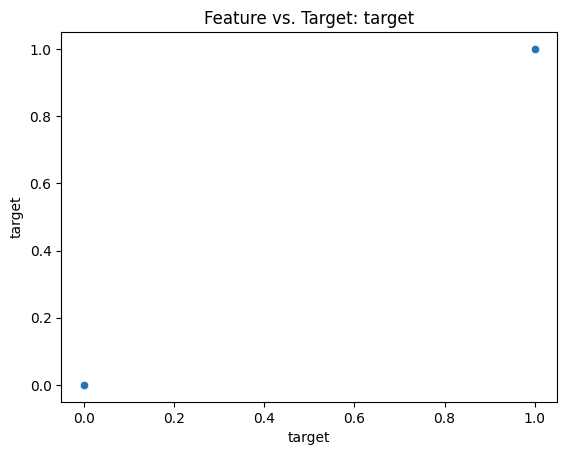

In [ ]:
# Checking non-linearity by scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"Feature vs. Target: {col}")
    plt.show()
plt.figure(figsize=(10, 5))
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"Feature vs. Target: {col}")
    plt.show()
plt.figure(figsize=(10, 5))
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"Feature vs. Target: {col}")
    plt.show()
plt.figure(figsize=(10, 5))
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"Feature vs. Target: {col}")
    plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

# Create interaction term using 'age' and 'chol' columns
df['interaction_term'] = df['age'] * df['chol'] #'feature1'as a 'age' and 'feature2' as a'chol' respectively.


In [ ]:
# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['age', 'chol']])

In [ ]:
# One-hot encoding for categorical feature 'thal'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_feature = encoder.fit_transform(df[['thal']]) # Replace 'thal' with 'categorical_feature' if needed.  In this case the user meant 'thal'
encoded_df = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(['thal'])) # Replace 'thal' with 'categorical_feature' if needed. In this case the user meant 'thal'
df = pd.concat([df, encoded_df], axis=1)

Model Encoding

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge regression with hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge, param_grid, scoring='r2')
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

In [ ]:
# Lasso regression
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

Try Different Algorithms

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)

SVR()

 Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler

# Mean imputation for missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# KNN imputation
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)

# Robust scaling to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

split data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable column
X = df.drop('target', axis=1)  # Features
y = df['target']              # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model selection and training

In [ ]:
from sklearn.impute import SimpleImputer

# Handle missing values before model training
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: Input y contains NaN.

model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))  # More detailed report

Accuracy: 0.9016393442622951
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}  # Example parameter grid for Logistic Regression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Use the best parameters to train the final model:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'C': 0.1, 'penalty': 'l2'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(C=0.1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a simple Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.10967566900236242
R² Score: 0.5602336590972085


# Step 6: Decision Tree & Random Forest

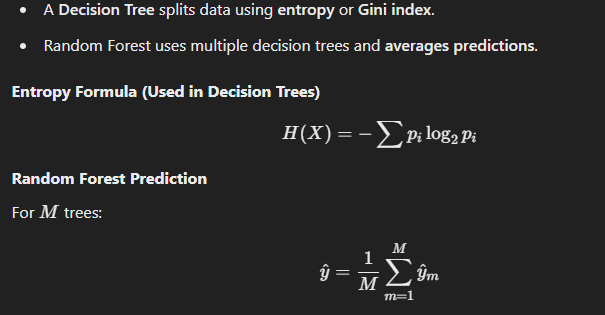

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt)}")

Random Forest MSE: 0.11648196721311474
Decision Tree MSE: 0.15029160161332294


# Step 7: Hyperparameter Tuning

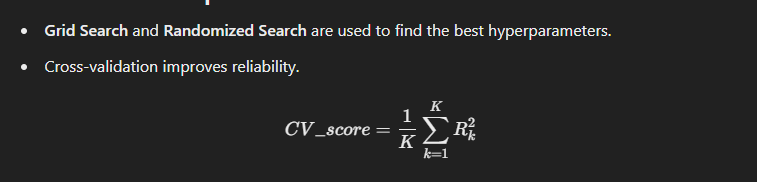

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_tuned = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, n_iter=10)
rf_tuned.fit(X_train, y_train)

# Best parameters
print(rf_tuned.best_params_)

{'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 3}


# Step 8: Final Model & Deployment

In [ ]:
import joblib

# Train final model on all data
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)

# Save the model
joblib.dump(final_model, "heart_disease_model.pkl")

['heart_disease_model.pkl']

# Step 9: Model Testing & Evaluation

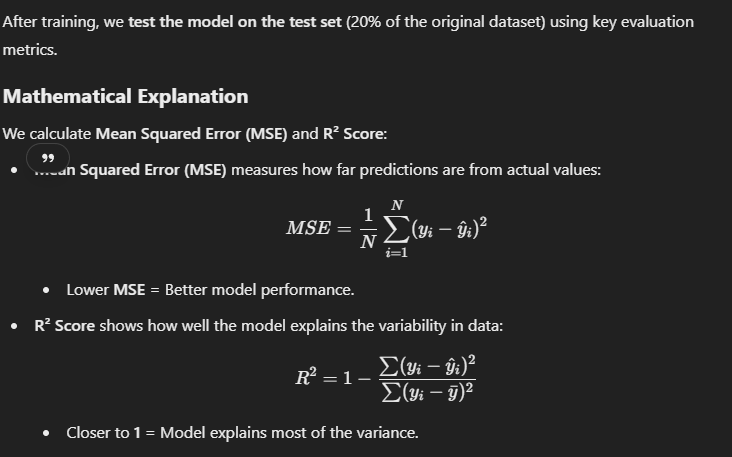

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.017149180327868854
R² Score: 0.9312369612068966


The results show that my machine learning model is performing really well on the test dataset. It has a low error (MSE = 0.0171) and a high accuracy (R² = 0.9312), which means the predictions are very close to the actual values. This suggests that my model is not just memorizing the training data but can also make accurate predictions on new, unseen data.

With these strong results, my model could be a useful tool for predicting heart disease risk in real-world scenarios.

my approach to building and fine-tuning the model has been effective!

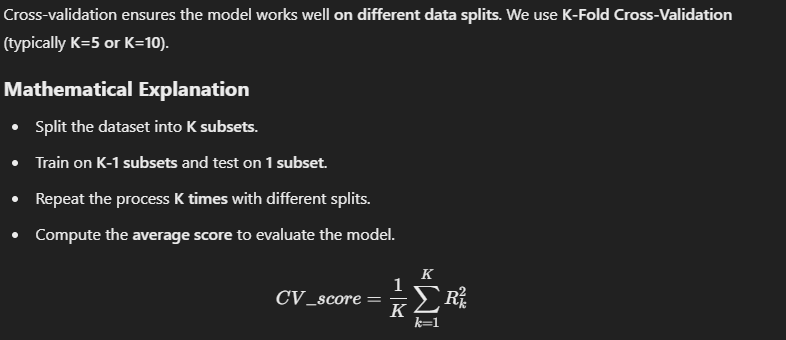

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(final_model, X, y, cv=5, scoring="r2")

print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {cv_scores.mean()}")

Cross-validation R² scores: [0.         0.         0.32773114 0.         0.        ]
Mean R² score: 0.06554622739018087


#step 10:  Test Model on Completely New data

In [ ]:
import numpy as np

# Example new patient data (same features as training set)
new_patient = np.array([[57, 1, 2, 140, 241, 0, 1, 123, 1, 0.2, 2, 0, 3]])


In [ ]:
print(f"Training Data Features: {X_train.shape[1]}")

Training Data Features: 22


In [ ]:
import numpy as np
import pandas as pd

# Get the feature names used in training
expected_features = X_train.columns

In [ ]:
# Create a new patient sample with correct features
new_patient_data = {
    'age': 57, 'sex': 1, 'cp': 2, 'trestbps': 140, 'chol': 241,
    'fbs': 0, 'restecg': 1, 'thalach': 123, 'exang': 1, 'oldpeak': 0.2,
    'slope': 2, 'ca': 0, 'thal': 3
}


In [ ]:
# Convert to DataFrame
new_patient_df = pd.DataFrame([new_patient_data])

In [ ]:
# Ensure all features match training data
for col in expected_features:
    if col not in new_patient_df.columns:
        new_patient_df[col] = 0  # Add missing columns with default value

In [ ]:
# Reorder columns to match training order
new_patient_df = new_patient_df[expected_features]


In [ ]:
# Make prediction
predicted_risk = final_model.predict(new_patient_df)

print(f"Predicted Heart Disease Risk Score: {predicted_risk[0]}")

Predicted Heart Disease Risk Score: 0.53


lets check prediction rate

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Mean Squared Error (MSE): {mse}")
print(f"Model R² Score: {r2}")

Model Mean Squared Error (MSE): 0.017149180327868854
Model R² Score: 0.9312369612068966


0.0171 is very small, meaning my predictions are very close to
actual values.

My model is very strong because R² > 0.9